In [1]:
from main import Task, train, test

In [2]:
task = Task()
samples, labels = task.next_batch()

In [3]:
# (batchsize, max_len, vocab_size + 1)
samples.shape

(100, 10, 3)

In [4]:
samples[0]

array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [5]:
# (batchsize, vocab_size + 1, max_len + 1)
labels.shape

(100, 3, 11)

In [6]:
labels[0]

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

# Without Self-Attention

In [7]:
_ = train(print_every=250, self_att=False)

Iteration 250 - Loss 0.6507306098937988
Iteration 500 - Loss 0.32723239064216614
Iteration 750 - Loss 0.30848008394241333
Iteration 1000 - Loss 0.2521244287490845
Iteration 1250 - Loss 0.15951348841190338
Iteration 1500 - Loss 0.15381412208080292
Iteration 1750 - Loss 0.10007693618535995
Iteration 2000 - Loss 0.11317804455757141
Iteration 2000 - Loss 0.11317804455757141
Training complete!



Input: 
[[[' ']
  ['C']
  ['B']
  ['B']
  ['B']
  ['A']
  ['A']
  ['B']
  ['C']
  ['A']]]

Prediction: 
[[3 4 2 1]]

Encoder-Decoder Attention: 
Output step 0 attended mainly to Input steps: [5 6 9]
[0.093, 0.069, 0.035, 0.035, 0.035, 0.21, 0.21, 0.035, 0.069, 0.21]
Output step 1 attended mainly to Input steps: [2 3 4 7]
[0.081, 0.057, 0.18, 0.18, 0.18, 0.028, 0.028, 0.18, 0.057, 0.028]
Output step 2 attended mainly to Input steps: [1 8]
[0.078, 0.287, 0.051, 0.051, 0.051, 0.048, 0.048, 0.051, 0.287, 0.048]
Output step 3 attended mainly to Input steps: [2 3 4 7]
[0.076, 0.04, 0.124, 0.124, 0.124, 0.117, 0.117, 0.124, 0.04, 0.117]


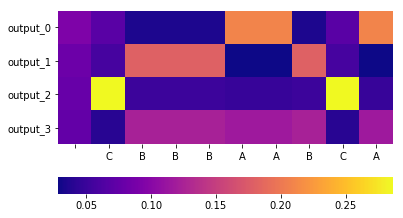

In [8]:
_ = test(self_att=False)

# With Self-Attention

In [9]:
loss_hist = train(print_every=250, self_att=True)

Iteration 250 - Loss 0.5232131481170654
Iteration 500 - Loss 0.21357759833335876
Iteration 750 - Loss 0.14652642607688904
Iteration 1000 - Loss 0.06169300153851509
Iteration 1250 - Loss 0.045857205986976624
Iteration 1500 - Loss 0.048864301294088364
Iteration 1750 - Loss 0.05512409284710884
Iteration 2000 - Loss 0.04118742793798447
Iteration 2000 - Loss 0.04118742793798447
Training complete!



Input: 
[[['C']
  ['C']
  [' ']
  ['A']
  ['A']
  ['C']
  ['A']
  ['C']
  ['B']
  ['B']]]

Prediction: 
[[3 2 4 1]]

Encoder-Decoder Attention: 
Output step 0 attended mainly to Input steps: [3 4 6]
[0.083, 0.083, 0.091, 0.171, 0.171, 0.083, 0.171, 0.083, 0.032, 0.032]
Output step 1 attended mainly to Input steps: [8 9]
[0.096, 0.096, 0.105, 0.037, 0.037, 0.096, 0.037, 0.096, 0.2, 0.2]
Output step 2 attended mainly to Input steps: [0 1 5 7]
[0.19, 0.19, 0.091, 0.031, 0.031, 0.19, 0.031, 0.19, 0.028, 0.028]
Output step 3 attended mainly to Input steps: [3 4 6]
[0.066, 0.066, 0.083, 0.134, 0.134, 0.066, 0.134, 0.066, 0.126, 0.126]


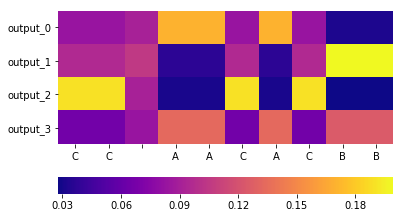


Self-Attention: 
Attention of Output step 0:
[0.999, 0.0, 0.0, 0.001]
Attention of Output step 1:
[0.0, 1.0, 0.0, 0.0]
Attention of Output step 2:
[0.011, 0.008, 0.975, 0.006]
Attention of Output step 3:
[0.61, 0.029, 0.001, 0.36]


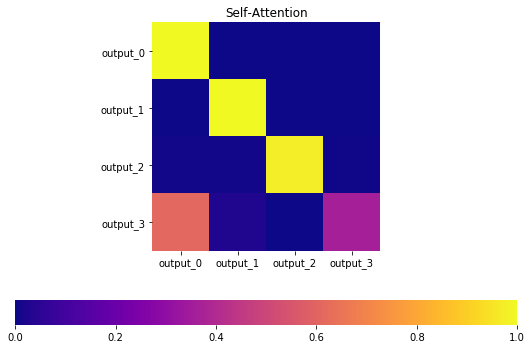

In [10]:
samples, labels, predictions, attention, self_attention = test(self_att=True)